### ep2-julia: linear regression

### Linear regression

Given a dataset $\{(\mathbf{x}^{(1)}, y^{(1)}), \dots ,(\mathbf{x}^{(N)}, y^{(N)})\}$ with $\mathbf{x}^{(i)} \in \mathbb{R}^{d}$ and $y^{(i)} \in \mathbb{R}$, we would like to approximate the unknown function $f:\mathbb{R}^{d} \rightarrow \mathbb{R}$ (recall that $y^{(i)} =f(\mathbf{x}^{(i)})$) by means of a linear model $h$:
$$
h(\mathbf{x}^{(i)}; \mathbf{w}, b) = \mathbf{w}^\top  \mathbf{x}^{(i)} + b
$$

Note that $h(\mathbf{x}^{(i)}; \mathbf{w}, b)$ is, in fact, an  [affine transformation](https://en.wikipedia.org/wiki/Affine_transformation) of  $\mathbf{x}^{(i)}$. As commonly done, we will use the term "linear" to refer to an affine transformation.

The output of $h$ is a linear transformation of $\mathbf{x}^{(i)}$. We use the notation $h(\mathbf{x}^{(i)}; \mathbf{w}, b)$ to make clear that $h$ is a parametric model, i.e., the transformation $h$ is defined  by the parameters $\mathbf{w}$ and $b$. We can view vector $\mathbf{w}$ as a *weight* vector that controls the effect of each *feature* in the prediction.

By adding one component with value equal to 1 to the observations $\mathbf{x}$ (an artificial coordinate), we have:

$$\tilde{\mathbf{x}} = (1, x_1, \ldots, x_d) \in \mathbb{R}^{1+d}$$

and then we can simplify the notation:
$$
h(\mathbf{x}^{(i)}; \mathbf{w}) = \hat{y}^{(i)} = \mathbf{w}^\top  \tilde{\mathbf{x}}^{(i)}
$$

We would like to determine the optimal parameters $\mathbf{w}$ such that prediction $\hat{y}^{(i)}$ is as closest as possible to $y^{(i)}$ according to some error metric. Adopting the *mean square error* as such metric we have the following cost function:

\begin{equation}
J(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^{N}\big(\hat{y}^{(i)} - y^{(i)}\big)^{2}
\end{equation}

Thus, the task of determining a function $h$ that is closest to $f$ is reduced to the task of finding the values $\mathbf{w}$ that minimize $J(\mathbf{w})$.


In [1]:
# libraries
using LinearAlgebra    # pinv pseudo-inverse matrix
using Metrics          # r2-score
using Random
using Distributions
using Plots; gr()
using Printf

using CSV
using DataFrames

### code d = 1

In [2]:
# generates artificial linear data
function artificial_linear_data(N)
    X = [range(90, 1200; length=N);]
    gamma = rand(Normal(30, 10), N)
    y = 50 * X + gamma * 400
    (X, y)
end

X, y = artificial_linear_data(100)
size(X), mean(X), std(X), size(y), mean(y), std(y)

((100,), 645.0000000000001, 325.2803645780711, (100,), 44313.76741245328, 17449.078835945413)

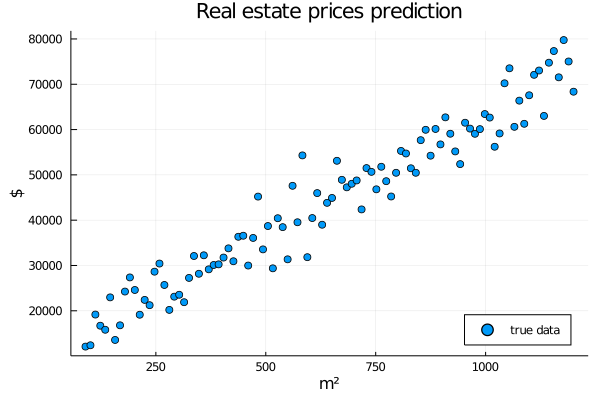

In [3]:
function plot_points_regression(X, y)
    scatter(X, y, 
        title = "Real estate prices prediction",
        xlabel = "m\u00b2",
        ylabel = "\$",
        yformatter = :plain,
        legend = :bottomright,
        legendfontsize = 8,
        label = "true data")
end

plot_points_regression(X, y)

Cap 3 lecture Prof Mostafa

Colocar aqui a demonstração de minimizar Ein matricialmente (igualar o gradiente a zero), matriz pseudo-inversa de X, etc.

In [4]:
# function that implements linear regression calculation (weights calculation) from (X, y) data available.
function linear_regression_weights(X, y)   # normal_equation_weights
    N = size(X)[1]
    X_til = hcat(ones(N), X)
    w = pinv(X_til) * y   # = inv(X_til' * X_til) * X_til'
end

w = linear_regression_weights(X, y)

2-element Array{Float64,1}:
 10764.42057606611
    52.01449121920491

In [5]:
# function that predicts ŷ values from w and unkwown values of X.
function linear_regression_prediction(X, w)
    N = size(X)[1]
    X_til = hcat(ones(N), X)
    ŷ = X_til * w
end

ŷ = linear_regression_prediction(X, w)
r2 = r2_score(ŷ, y)

0.9401981580990151

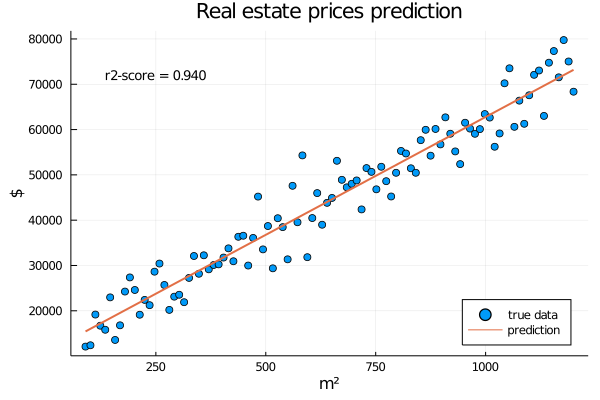

In [6]:
plot_points_regression(X, y)
plot!(X, ŷ, label = "prediction", linewidth = 2)
annotate!(250, 72000, text(@sprintf("r2-score = %.3f", r2), 9))

In [7]:
# Let us use the prediction function
x = [650]
prediction = linear_regression_prediction(x, w)
@printf("size = %s m2; predicted value = \$ %0.2f", x[1], prediction[1])


size = 650 m2; predicted value = $ 44573.84

### dataframe example, d = 1

In [8]:
# read dataframe
df = CSV.File("QT1data.csv") |> DataFrame
println(first(df, 10))

# get y = weight (outcome)
y = df.Weight .|> Float64
display(typeof(y))

# get X = predictors
X = df.Height
display(size(X))


Array{Float64,1}

(130,)

10×6 DataFrame
 Row │ Sex      Age    Height  Weight  Shoe number  Trouser number 
     │ String7  Int64  Int64   Int64   Int64        String3        
─────┼─────────────────────────────────────────────────────────────
   1 │ Female      53     154      59           36  40
   2 │ Male        23     170      56           40  38
   3 │ Female      23     167      63           37  40
   4 │ Male        21     178      78           40  40
   5 │ Female      25     153      58           36  38
   6 │ Male        28     180      89           43  46
   7 │ Male        23     183      68           42  38
   8 │ Male        32     174      83           40  44
   9 │ Female      24     160      70           37  42
  10 │ Female      22     156      56           36  40


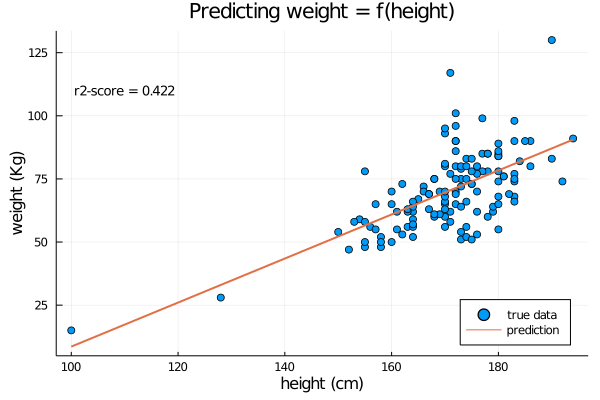

In [9]:
w = linear_regression_weights(X, y)
ŷ = linear_regression_prediction(X, w)
r2 = r2_score(ŷ, y)

scatter(X, y, 
    title = "Predicting weight = f(height)",
    label = "true data", 
    legend = :bottomright,
    xlabel="height (cm)",
    ylabel="weight (Kg)")
plot!(X, ŷ, 
    label = "prediction", 
    linewidth = 2)
annotate!(110, 110, text(@sprintf("r2-score = %.3f", r2), 9))

### d = 2

In [10]:
# get X = predictors
feature_cols = ["Height", "Shoe number"]
X = df[:, feature_cols] |> Array
display(size(X))

w = linear_regression_weights(X, y)
ŷ = linear_regression_prediction(X, w)
r2 = r2_score(ŷ, y)


(130, 2)

0.45381183096658584

### d = 3

In [11]:
# get X = predictors
feature_cols = ["Shoe number", "Age", "Height"]
X = df[:, feature_cols] |> Array
display(size(X))

w = linear_regression_weights(X, y)
ŷ = linear_regression_prediction(X, w)
r2 = r2_score(ŷ, y)

(130, 3)

0.47764994986696163